### Curso de Python para Finanças Quantitativas

#### Aula 7 - Coletando dados da Investing.com com Python para ações e criptomoedas
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

In [ ]:
#!pip3 install investpy

In [38]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import investpy as inv

In [39]:
plt.style.use("fivethirtyeight")
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

#### Primeiro vamos entender a lib de um modo geral: sempre leia a documentação 

https://investpy.readthedocs.io

investpy - Financial Data Extraction from Investing.com with Python developed by Alvaro Bartolome del Canto

In [40]:
# Depois, comecemos as análises

tudo_brasil = inv.get_stocks_overview(country = "Brazil"
                        , as_json = False
                        , n_results = 100)

tudo_brasil

,country,name,symbol,last,high,low,change,change_percentage,turnover,currency
0,brazil,ABC BRASIL PN,ABCB4,15.79,16.05,15.58,-0.24,-1.50%,347800,BRL
1,brazil,BRASILAGRO ON,AGRO3,24.37,25.00,24.19,-0.11,-0.45%,346800,BRL
2,brazil,RUMO ON NM,RAIL3,17.09,17.43,17.00,+0.07,+0.41%,2510000,BRL
3,brazil,ALPARGATAS ON,ALPA3,35.93,37.00,35.93,0.00,0.00%,0,BRL
4,brazil,ALPARGATAS PN,ALPA4,42.62,43.27,42.25,-0.43,-1.00%,731900,BRL
...,...,...,...,...,...,...,...,...,...,...
95,brazil,JHSF PART ON,JHSF3,4.97,5.06,4.90,-0.21,-4.05%,7740000,BRL
96,brazil,Simpar ON,ABCB4,11.50,11.99,11.50,-0.24,-2.04%,662600,BRL
97,brazil,KEPLER WEBER ON,KEPL3,32.99,33.32,32.72,+0.09,+0.27%,71900,BRL
98,brazil,KLABIN S/A PN,KLBN4,4.34,4.43,4.34,-0.03,-0.69%,125500,BRL


In [41]:
# Agora, vamos entender algumas funções especiais

ticker = "PETR4" # a lib não aceita um vetor com mais ações como entrada

In [42]:
# Descrição da empresa

petro_desc = inv.get_stock_company_profile(stock = ticker
                                           , country = "Brazil")

petro_desc

{'url': 'https://www.investing.com/equities/petrobras-pn-company-profile',
 'desc': 'Petróleo Brasileiro S.A. - Petrobras produce and sells oil and gas in Brazil and internationally. It engages in prospecting, drilling, refining, processing, trading, and transporting crude oil from producing onshore and offshore oil fields, and shale or other rocks, as well as oil products, natural gas, and other liquid hydrocarbons. The company operates through Exploration and Production; Refining, Transportation and Marketing; Gas and Power; and Corporate and Other Businesses segments. The Exploration and Production segment explores for, develops, and produces crude oil, natural gas liquids, and natural gas primarily for supplies to the its domestic refineries. The Refining, Transportation and Marketing segment engages in the refining, logistics, transport, marketing, and trading of crude oil and oil products; exportation of ethanol; and extraction and processing of shale, as well as holding interest

In [54]:
# Informações de receita

petro_receita = inv.get_stock_financial_summary(stock = ticker
                                                , country = "Brazil"
                                                , summary_type = "income_statement"
                                                , period = "quarterly")

petro_receita

,Total Revenue,Gross Profit,Operating Income,Net Income
Date,,,,
2020-12-31,272069.0,98852.0,49621.0,7108.0
2019-12-31,302245.0,101935.0,81701.0,40137.0
2018-12-31,310255.0,100606.0,62465.0,25779.0
2017-12-31,283695.0,91595.0,37773.0,-446.0


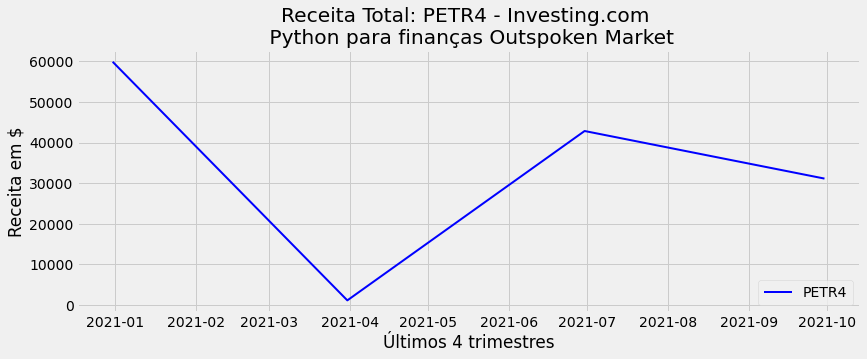

In [49]:
# Visualização

plt.figure(figsize=(12.5,4.5))
plt.plot(petro_receita["Net Income"], label = "PETR4", linewidth = 2, color = "blue")
plt.title("Receita Total: PETR4 - Investing.com \n Python para finanças Outspoken Market")
plt.xlabel("Últimos 4 trimestres")
plt.ylabel("Receita em $")
plt.legend(loc = "lower right")
plt.show()

In [50]:
# Mas quais outras informações eu posso pegar?
# Consulte sempre a documentação. Quando ela não estiver tão clara
# tente também a função help(nome_função)

help(inv.get_stock_financial_summary)

Help on function get_stock_financial_summary in module investpy.stocks:

get_stock_financial_summary(stock, country, summary_type='income_statement', period='annual')
    This function retrieves the financial summary of the introduced stock (by symbol) from the introduced
    country, based on the summary_type value this function returns a different type of financial summary, so
    that the output format of this function depends on its type. Additionally, the period of the retrieved
    financial summary type can be specified.
    
    Args:
        stock (:obj:`str`): symbol of the stock to retrieve its financial summary.
        country (:obj:`str`): name of the country from where the introduced stock symbol is.
        summary_type (:obj:`str`, optional):
            type of the financial summary table to retrieve, default value is `income_statement`, but all the 
            available types are: `income_statement`, `cash_flow_statement` and `balance_sheet`.
        period (:obj:`s

In [57]:
# Para informações adicionais da ação

petro = inv.get_stock_information(stock = ticker
                                  , country = "Brazil"
                                  , as_json = False).transpose()

petro

,0
Stock Symbol,PETR4
Prev. Close,26.1
Todays Range,26.29-27.13
Revenue,393450000000.0
Open,26.3
52 wk Range,20.48-31.76
EPS,10.35
Volume,32498700.0
Market Cap,348570000000.0
Dividend (Yield),2.40(19.63%)


In [58]:
# Dados históricos da cotação

inicio = "01/01/2020"
fim = "22/11/2021"

petr4 = inv.get_stock_historical_data(stock = ticker
                                      , country = "Brazil"
                                      , from_date = inicio
                                      , to_date = fim)
petr4

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-01-02,30.51,30.70,30.31,30.70,37774500,BRL
2020-01-03,30.88,31.24,30.45,30.45,71595600,BRL
2020-01-06,30.43,30.94,29.95,30.81,81844000,BRL
2020-01-07,30.82,30.88,30.47,30.69,32822000,BRL
2020-01-08,30.69,30.77,30.24,30.50,48215600,BRL
...,...,...,...,...,...,...
2021-11-16,27.26,27.56,26.63,27.27,60978200,BRL
2021-11-17,27.39,27.44,26.49,26.58,82106800,BRL
2021-11-18,26.69,26.75,26.05,26.54,63993000,BRL


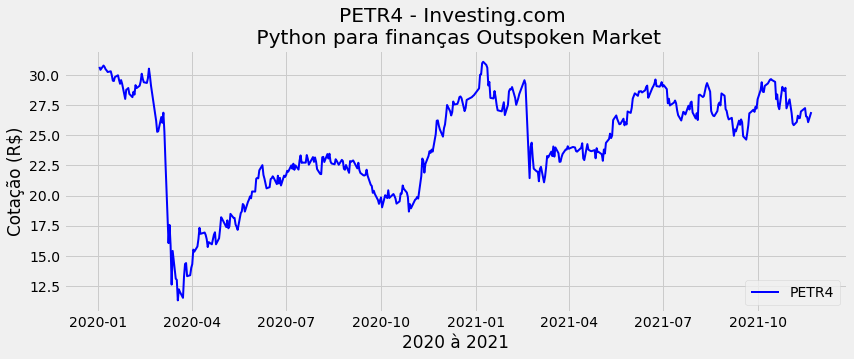

In [59]:
# Visualização

plt.figure(figsize = (12.5,4.5))
plt.plot(petr4["Close"], label = "PETR4", linewidth = 2, color = "blue")
plt.title("PETR4 - Investing.com \n Python para finanças Outspoken Market")
plt.xlabel("2020 à 2021")
plt.ylabel("Cotação (R$)")
plt.legend(loc = "lower right")
plt.show()

In [62]:
# Mas, e se eu quiser os indicadores técnicos?

petro_ind = inv.search_quotes(text = ticker
                              , products=["stocks"]
                              , countries=["brazil"]
                              , n_results = 1)
print(petro_ind)

{"id_": 18750, "name": "Petroleo Brasileiro SA PN", "symbol": "PETR4", "country": "brazil", "tag": "/equities/petrobras-pn", "pair_type": "stocks", "exchange": "BM&FBovespa"}


In [63]:
# Use o método retrieve_technical_indicators

petro_ind_d1 = petro_ind.retrieve_technical_indicators(interval = "daily")
petro_ind_d1

,indicator,value,signal
0,RSI(14),48.0750,neutral
1,"STOCH(9,6)",49.4160,neutral
2,STOCHRSI(14),89.1440,overbought
3,"MACD(12,26)",-0.2200,sell
4,ADX(14),39.4410,neutral
5,Williams %R,-54.6150,neutral
6,CCI(14),5.0071,neutral
7,ATR(14),0.9350,less_volatility
8,Highs/Lows(14),0.0000,neutral
9,Ultimate Oscillator,52.0410,buy


In [64]:
petro_ind_semanal = petro_ind.retrieve_technical_indicators(interval = "weekly")
petro_ind_semanal

,indicator,value,signal
0,RSI(14),50.0230,neutral
1,"STOCH(9,6)",41.7470,sell
2,STOCHRSI(14),38.1460,sell
3,"MACD(12,26)",0.0600,buy
4,ADX(14),14.6150,neutral
5,Williams %R,-51.6330,neutral
6,CCI(14),-24.4542,neutral
7,ATR(14),2.1086,less_volatility
8,Highs/Lows(14),0.0000,neutral
9,Ultimate Oscillator,39.5830,sell


In [65]:
petro_ind_mensal = petro_ind.retrieve_technical_indicators(interval = "monthly")
petro_ind_mensal

,indicator,value,signal
0,RSI(14),54.5440,neutral
1,"STOCH(9,6)",65.7730,buy
2,STOCHRSI(14),68.2070,buy
3,"MACD(12,26)",1.2400,buy
4,ADX(14),22.7690,buy
5,Williams %R,-34.6650,buy
6,CCI(14),54.3349,buy
7,ATR(14),4.4461,less_volatility
8,Highs/Lows(14),0.0000,neutral
9,Ultimate Oscillator,57.2080,buy


In [66]:
# Vamos combinar os valores dos diferentes timeframes em uma única tabela


petro_at = pd.DataFrame([petro_ind_d1["indicator"], petro_ind_d1["value"]
                         , petro_ind_semanal["value"], petro_ind_mensal["value"]]).transpose()

petro_at

,indicator,value,value,value
0,RSI(14),48.075,50.023,54.544
1,"STOCH(9,6)",49.416,41.747,65.773
2,STOCHRSI(14),89.144,38.146,68.207
3,"MACD(12,26)",-0.22,0.06,1.24
4,ADX(14),39.441,14.615,22.769
5,Williams %R,-54.615,-51.633,-34.665
6,CCI(14),5.0071,-24.4542,54.3349
7,ATR(14),0.935,2.1086,4.4461
8,Highs/Lows(14),0.0,0.0,0.0
9,Ultimate Oscillator,52.041,39.583,57.208


In [67]:
petro_at.set_axis(["Indicador", "D1", "Semanal", "Mensal"], axis = 1, inplace = True)
petro_at.set_index(petro_at["Indicador"], drop = True, inplace = True)
petro_at

,Indicador,D1,Semanal,Mensal
Indicador,,,,
RSI(14),RSI(14),48.075,50.023,54.544
"STOCH(9,6)","STOCH(9,6)",49.416,41.747,65.773
STOCHRSI(14),STOCHRSI(14),89.144,38.146,68.207
"MACD(12,26)","MACD(12,26)",-0.22,0.06,1.24
ADX(14),ADX(14),39.441,14.615,22.769
Williams %R,Williams %R,-54.615,-51.633,-34.665
CCI(14),CCI(14),5.0071,-24.4542,54.3349
ATR(14),ATR(14),0.935,2.1086,4.4461
Highs/Lows(14),Highs/Lows(14),0.0,0.0,0.0


In [68]:
# Selecionando apenas os indicadores de momentum

petro_momentum = petro_at.iloc[[0, 4, 5, 6], :].copy()
petro_momentum

,Indicador,D1,Semanal,Mensal
Indicador,,,,
RSI(14),RSI(14),48.075,50.023,54.544
ADX(14),ADX(14),39.441,14.615,22.769
Williams %R,Williams %R,-54.615,-51.633,-34.665
CCI(14),CCI(14),5.0071,-24.4542,54.3349


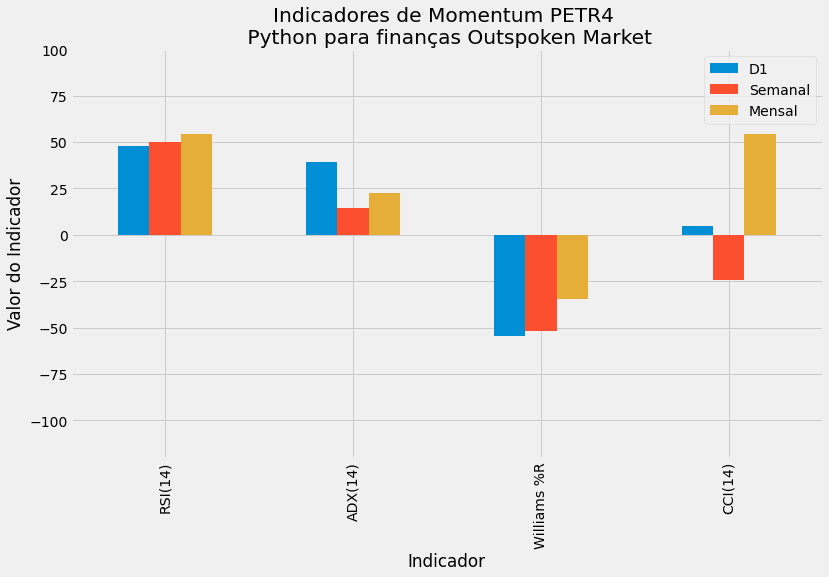

In [69]:
petro_momentum.plot(kind = "bar"
              , title = "Indicadores de Momentum PETR4 \n Python para finanças Outspoken Market"
              , figsize = (12, 7))
plt.ylabel("Valor do Indicador")
plt.ylim(-120, 100)
plt.legend(loc = "upper right");

### Para as criptomoedas, temos funções específicas 

In [70]:
inv.search_cryptos(by = "name"
                   , value = "bitcoin")

# Repare que o método retorna tudo o que tem BTC no nome
# A lib não permite alterar a moeda

,name,symbol,currency,status
0,Bitcoin,BTC,USD,available
1,Bitcoin Cash,BCH,USD,available
2,Wrapped Bitcoin,WBTC,USD,available
3,Bitcoin SV,BSV,USD,available
4,Bitcoin BEP2,BTCB,,not available
...,...,...,...,...
63,Bitcoin & Company Network,BITN,,unavailable
64,Bitfinex Bitcoin Dominance Perps,BTCDOM,,unavailable
65,Inverse Bitcoin Volatility Token,IBVOL,,unavailable
66,1x Long Bitcoin Implied Volatility Token,BVOL,,unavailable


In [71]:
btc = inv.get_crypto_historical_data(crypto = "Bitcoin"
                                     , from_date = inicio
                                     , to_date = fim)
btc

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-01-01,7196.4,7259.4,7180.0,7199.8,420278,USD
2020-01-02,7199.7,7209.6,6901.4,6967.0,632778,USD
2020-01-03,6967.1,7402.9,6884.1,7343.1,936288,USD
2020-01-04,7345.1,7433.1,7291.4,7376.8,523909,USD
2020-01-05,7376.8,7501.0,7345.6,7372.5,628142,USD
...,...,...,...,...,...,...
2021-11-18,60368.2,60936.9,56524.4,56955.3,100370,USD
2021-11-19,56908.3,58335.9,55626.3,58083.4,74438,USD
2021-11-20,58080.8,59854.6,57435.3,59717.6,44534,USD


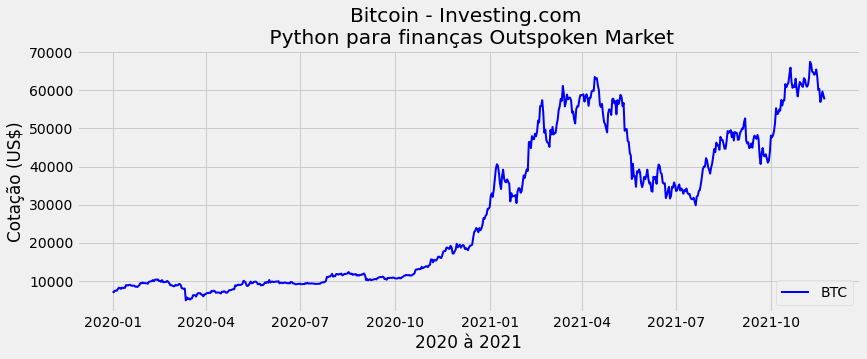

In [72]:
# Visualização

plt.figure(figsize = (12.5,4.5))
plt.plot(btc["Close"], label = "BTC", linewidth = 2, color = "blue")
plt.title("Bitcoin - Investing.com \n Python para finanças Outspoken Market")
plt.xlabel("2020 à 2021")
plt.ylabel("Cotação (US$)")
plt.legend(loc = "lower right")
plt.show()

In [73]:
# E como recuperar informações de outras exchanges?

busca_cripto = inv.search_quotes(text = "Bitcoin"
                                 , products = ["cryptos"]
                                 , n_results = 100)

In [74]:
# Parece um dicionário ou um json, mas nao é

type(busca_cripto)

list

In [75]:
for item in busca_cripto:
    print(item)

{"id_": 945629, "name": "Bitcoin US Dollar", "symbol": "BTC/USD", "country": null, "tag": "/crypto/bitcoin/btc-usd", "pair_type": "cryptos", "exchange": "Bitfinex"}
{"id_": 1056827, "name": "Monetha Bitcoin", "symbol": "MTH/BTC", "country": null, "tag": "/crypto/monetha/mth-btc", "pair_type": "cryptos", "exchange": "Binance"}
{"id_": 1056825, "name": "Ambrosus Bitcoin", "symbol": "AMB/BTC", "country": null, "tag": "/crypto/amber/amb-btc", "pair_type": "cryptos", "exchange": "Binance"}
{"id_": 1056824, "name": "Genesis Vision Bitcoin", "symbol": "GVT/BTC", "country": null, "tag": "/crypto/genesis-vision/gvt-btc", "pair_type": "cryptos", "exchange": "Binance"}
{"id_": 1056821, "name": "Waltonchain Bitcoin", "symbol": "WTC/BTC", "country": null, "tag": "/crypto/waltonchain/wtc-btc", "pair_type": "cryptos", "exchange": "Binance"}
{"id_": 1056819, "name": "SONM Bitcoin", "symbol": "SNM/BTC", "country": null, "tag": "/crypto/sonm/snm-btc", "pair_type": "cryptos", "exchange": "Binance"}
{"id_

In [77]:
type(busca_cripto[0])

In [83]:
# Então como eu leio isso?

busca_cripto[0].exchange

'Bitfinex'

In [86]:
data = []
for item in busca_cripto:
    data.append([item.name, item.symbol, item.exchange])
    
busca_cripto_df = pd.DataFrame(data, columns = ["Nome", "Simbolo", "Exchange"])

busca_cripto_df.head()

,Nome,Simbolo,Exchange
0,Bitcoin US Dollar,BTC/USD,Bitfinex
1,Monetha Bitcoin,MTH/BTC,Binance
2,Ambrosus Bitcoin,AMB/BTC,Binance
3,Genesis Vision Bitcoin,GVT/BTC,Binance
4,Waltonchain Bitcoin,WTC/BTC,Binance


In [87]:
# O códico acima serve para estrutuar e saber o que existe com o nome "Bitcoin"
# Útil para fazer a busca depois, como o exemplo abaixo

inv.get_crypto_historical_data(crypto = "Monetha"
                                     , from_date = inicio
                                     , to_date = fim)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-01-01,0.009965,0.010556,0.009374,0.009685,0,USD
2020-01-02,0.009685,0.009747,0.008746,0.008879,0,USD
2020-01-03,0.008879,0.009615,0.008557,0.009254,0,USD
2020-01-04,0.009254,0.009679,0.009124,0.009597,0,USD
2020-01-05,0.009597,0.009920,0.009365,0.009382,0,USD
...,...,...,...,...,...,...
2021-11-18,0.034701,0.035040,0.030808,0.031036,0,USD
2021-11-19,0.031036,0.031778,0.030311,0.031631,0,USD
2021-11-20,0.031631,0.039419,0.031576,0.036119,0,USD


In [88]:
monetha = inv.get_crypto_historical_data(crypto = "Monetha"
                                     , from_date = inicio
                                     , to_date = fim)

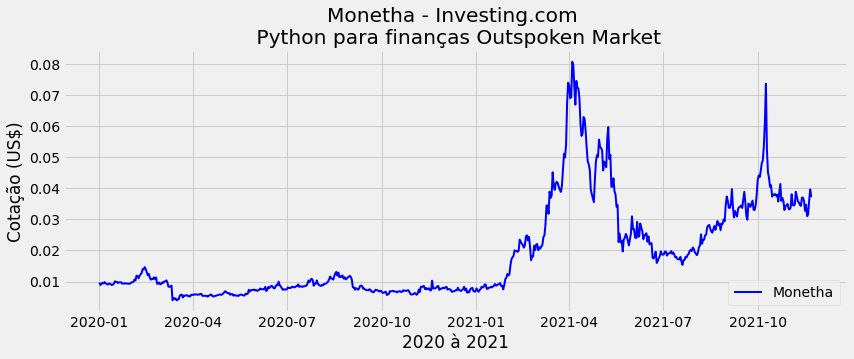

In [89]:
# Visualização

plt.figure(figsize = (12.5,4.5))
plt.plot(monetha["Close"], label = "Monetha", linewidth = 2, color = "blue")
plt.title("Monetha - Investing.com \n Python para finanças Outspoken Market")
plt.xlabel("2020 à 2021")
plt.ylabel("Cotação (US$)")
plt.legend(loc = "lower right")
plt.show()

### Calendário Economico

In [90]:
inv.economic_calendar()

,id,date,time,zone,currency,importance,event,actual,forecast,previous
0,173,22/11/2021,All Day,lebanon,None,None,Lebanon - Independence Day,None,None,None
1,215,22/11/2021,All Day,argentina,None,None,Argentina - Public Holiday,None,None,None
2,440909,22/11/2021,02:30,china,CNY,high,PBoC Loan Prime Rate,3.85%,None,3.85%
3,441145,22/11/2021,06:30,united kingdom,GBP,medium,Investing.com GBP/USD Index,54.5%,None,54.6%
4,441151,22/11/2021,06:30,united states,USD,medium,Investing.com Gold Index,53.2%,None,51.7%
...,...,...,...,...,...,...,...,...,...,...
57,440927,22/11/2021,23:00,australia,AUD,low,Manufacturing PMI,None,None,58.2
58,440928,22/11/2021,23:00,australia,AUD,low,Services PMI,None,None,51.8
59,440930,22/11/2021,23:45,new zealand,NZD,medium,Core Retail Sales (QoQ),None,None,3.4%
60,173,22/11/2021,All Day,lebanon,None,None,Lebanon - Independence Day,None,None,None


In [ ]:
# Filtrando para 2021 apenas os eventos importantes

agenda21 = inv.economic_calendar(from_date = "01/01/2021"
                                 , to_date = fim)

In [91]:
agenda21.query("importance == 'high'")

,id,date,time,zone,currency,importance,event,actual,forecast,previous
111,420613,04/01/2021,02:45,china,CNY,high,Caixin Manufacturing PMI (Dec),53.0,54.8,54.9
134,420630,04/01/2021,09:55,germany,EUR,high,German Manufacturing PMI (Dec),58.3,58.6,58.6
142,420636,04/01/2021,10:30,united kingdom,GBP,high,Manufacturing PMI (Dec),57.5,57.3,55.6
227,420674,05/01/2021,09:55,germany,EUR,high,German Unemployment Change (Dec),-37K,10K,-40K
251,420684,05/01/2021,16:00,united states,USD,high,ISM Manufacturing PMI (Dec),60.7,56.6,57.5
...,...,...,...,...,...,...,...,...,...,...
65824,440683,19/11/2021,09:30,euro zone,EUR,high,ECB President Lagarde Speaks,None,None,None
65839,439712,19/11/2021,14:30,canada,CAD,high,Core Retail Sales (MoM) (Sep),-0.2%,-1.0%,2.8%
65846,440739,19/11/2021,19:00,euro zone,EUR,high,ECB President Lagarde Speaks,None,None,None
65876,440909,22/11/2021,02:30,china,CNY,high,PBoC Loan Prime Rate,3.85%,None,3.85%


In [92]:
agenda21.query("importance == 'high'")["event"].unique()

array(['Caixin Manufacturing PMI  (Dec)',
       'German Manufacturing PMI  (Dec)', 'Manufacturing PMI  (Dec)',
       'German Unemployment Change  (Dec)',
       'ISM Manufacturing PMI  (Dec)', 'Composite PMI  (Dec)',
       'Services PMI  (Dec)', 'ADP Nonfarm Employment Change  (Dec)',
       'BoE Gov Bailey Speaks', 'Crude Oil Inventories',
       'FOMC Meeting Minutes', 'Construction PMI  (Dec)',
       'CPI (YoY)  (Dec)', 'ECB Monetary Policy Statement',
       'Initial Jobless Claims', 'ISM Non-Manufacturing PMI  (Dec)',
       'Ivey PMI  (Dec)', 'Nonfarm Payrolls  (Dec)',
       'Unemployment Rate  (Dec)', 'Employment Change  (Dec)',
       'Retail Sales (MoM)  (Nov)', 'ECB President Lagarde Speaks',
       'EIA Short-Term Energy Outlook', 'JOLTs Job Openings  (Nov)',
       'Core CPI (MoM)  (Dec)', 'Fed Chair Powell Speaks',
       'U.S. President Biden Speaks', 'GDP (MoM)',
       'Manufacturing Production (MoM)  (Nov)',
       'Monthly GDP 3M/3M Change', 'Core Retail Sales (M

In [93]:
agenda21.query('importance == "high" and event.str.contains("ADP Nonfarm Employment Change")', engine = "python")

,id,date,time,zone,currency,importance,event,actual,forecast,previous
423,421462,06/01/2021,14:15,united states,USD,high,ADP Nonfarm Employment Change (Dec),-123K,88K,304K
3040,422323,03/02/2021,14:15,united states,USD,high,ADP Nonfarm Employment Change (Jan),174K,49K,-78K
6139,424107,03/03/2021,14:15,united states,USD,high,ADP Nonfarm Employment Change (Feb),117K,177K,195K
9419,425885,31/03/2021,13:15,united states,USD,high,ADP Nonfarm Employment Change (Mar),517K,550K,176K
14854,427838,05/05/2021,13:15,united states,USD,high,ADP Nonfarm Employment Change (Apr),742K,800K,565K
21459,429633,03/06/2021,13:15,united states,USD,high,ADP Nonfarm Employment Change (May),978K,650K,654K
27127,431220,30/06/2021,13:15,united states,USD,high,ADP Nonfarm Employment Change (Jun),692K,600K,886K
35151,433292,04/08/2021,13:15,united states,USD,high,ADP Nonfarm Employment Change (Jul),330K,695K,680K
42759,434958,01/09/2021,13:15,united states,USD,high,ADP Nonfarm Employment Change (Aug),374K,613K,326K
52770,436977,06/10/2021,13:15,united states,USD,high,ADP Nonfarm Employment Change (Sep),568K,428K,340K


In [94]:
adp_21 = agenda21.query('importance == "high" and event.str.contains("ADP Nonfarm Employment Change")'
                        , engine = "python")
adp_21.set_index(adp_21["date"], drop = True, inplace = True)
adp_21 = adp_21.iloc[:, [7, 8, 9]]
adp_21.replace("K", "", regex = True, inplace = True)
adp_21["actual"] = pd.to_numeric(adp_21["actual"])
adp_21["forecast"] = pd.to_numeric(adp_21["forecast"])
adp_21["previous"] = pd.to_numeric(adp_21["previous"])
adp_21

,actual,forecast,previous
date,,,
06/01/2021,-123,88,304
03/02/2021,174,49,-78
03/03/2021,117,177,195
31/03/2021,517,550,176
05/05/2021,742,800,565
03/06/2021,978,650,654
30/06/2021,692,600,886
04/08/2021,330,695,680
01/09/2021,374,613,326


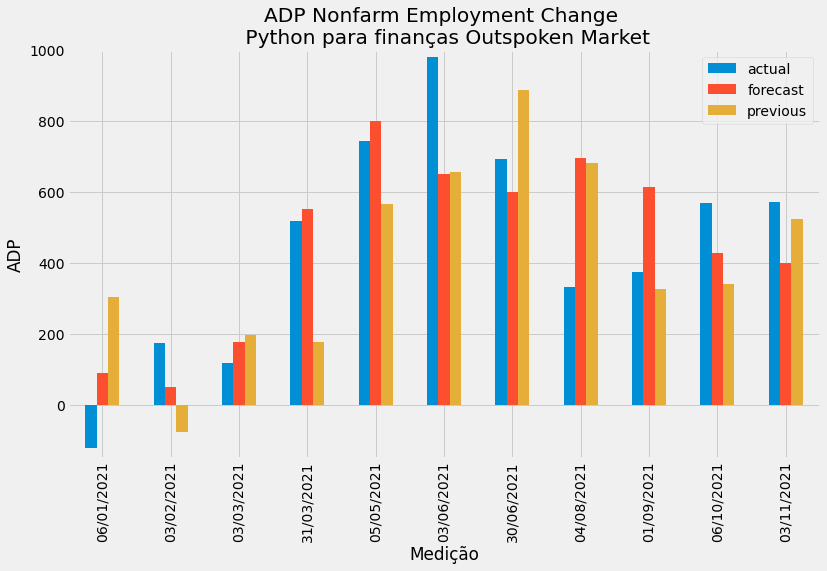

In [95]:
adp_21.plot(kind = "bar"
              , title = "ADP Nonfarm Employment Change \n Python para finanças Outspoken Market"
              , figsize = (12, 7))
plt.ylabel("ADP")
plt.xlabel("Medição")
plt.ylim(-150, 1000)
plt.legend(loc = "upper right");